# Lensing figures

Previously, I used the script `figure_routines.py` to create figures for the cluster lensing analysis. This notebook is being created to replace that.

In [1]:
import numpy as np
from helper_functions import *
from models import *
import os, sys
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import blinding
import cluster_toolkit as clusterwl

In [2]:
#plt.rc("text", usetex=True)
plt.rc("font", size=20, family="serif")
plt.rc("errorbar", capsize=3)

In [3]:
#Varous labels
DSlabel = r"$\Delta\Sigma\ [{\rm M}_\odot$/pc$^2$]"
Rlabel  = r"$R\ [{\rm Mpc}]$"

y1zlabels = [r"$z\in[0.2;0.35)$", r"$z\in[0.35;0.5)$", r"$z\in[0.5;0.65)$"]
y1llabels = [r"$\lambda\in[5;10)$",r"$\lambda\in[10;14)$",r"$\lambda\in[14;20)$",
             r"$\lambda\in[20;30)$",r"$\lambda\in[30;45)$",r"$\lambda\in[45;60)$",
             r"$\lambda\in[60;\infty)$"]

svzlabels = [r"$z\in[0.2,0.4)$",r"$z\in[0.4,0.6)$",r"$z\in[0.6,0.8)$"]
svllabels = [r"$\lambda\in[5;10)$",r"$\lambda\in[10;14)$",r"$\lambda\in[14;20)$",
             r"$\lambda\in[20;35)$",r"$\lambda\in[35;180)$"]

In [4]:
def add_lensing_data_to_axis(ax, args):
    R = args["R_all"]
    R_cut = args["R_cut"]
    DS_all = args["DeltaSigma_all"]
    DS_cut = args["DeltaSigma_cut"]
    DSe_all = np.sqrt(args["C_all"].diagonal())
    ax.errorbar(R, DS_all, DSe_all, ls="", marker='o')
    return

In [5]:
def get_best_unblinded_parameters(zi, lj, with_orientation=False):
    mean_parameters_all_stacks = np.load("chains/parameter_means.npy")
    if with_orientation:
        mean_parameters_all_stacks = np.load("chains/parameter_means_for_orientation.npy")
    return mean_parameters_all_stacks[zi, lj-3]

def get_bestfit_model(zi, lj, args, with_orientation=False):
    params = get_best_unblinded_parameters(zi, lj, with_orientation)
    print(params)
    Rp, Sigma, Sigma_mis, DeltaSigma, DeltaSigma_mis, \
        full_DeltaSigma, ave_DeltaSigma, boost_model = get_delta_sigma(params, args)
    return Rp, Sigma, Sigma_mis, DeltaSigma, DeltaSigma_mis, full_DeltaSigma, ave_DeltaSigma, boost_model

In [6]:
def add_bestfit_model_to_axis(ax, zi, lj, args, with_orientation=False, c='r'):
    h = args['h'] #Hubble constant
    z = args["z"]
    Xtemp = np.copy(args['X_ratio'])
    if not with_orientation:
        args['X_ratio'] = 1
    else:
        c='b'
    Rp, Sigma, Sigma_mis, DeltaSigma, DeltaSigma_mis, \
        full_DeltaSigma, ave_DeltaSigma, boost_model = get_bestfit_model(zi, lj, args, with_orientation)
    args['X_ratio'] = Xtemp
    #ax.plot(Rp/(h*(1+z)), full_DeltaSigma*h*(1+z)**2, c=c)
    ax.plot(args["R_all"], ave_DeltaSigma*h*(1+z)**2, c=c)
    return

('unmodified Bcov: ', array([6.61284244e-05, 2.84565524e-05, 1.80935411e-05, 1.41297254e-05,
       1.19632655e-05, 9.08484519e-06, 5.60752381e-06, 2.94660105e-06,
       1.30479707e-06, 2.60806881e-07]))
('Hartlap factor: ', 1.125)
	'name':Y1 supplied, using a pre-defined cosmology.
('z0l3 blinding factor: ', -0.02874510269458394)
[14.0317582   5.81270129  0.17258234  0.27972637  1.02462786  0.34299125
  0.43786744]
[0. 0. 0. 0. 0. 0. 0.]


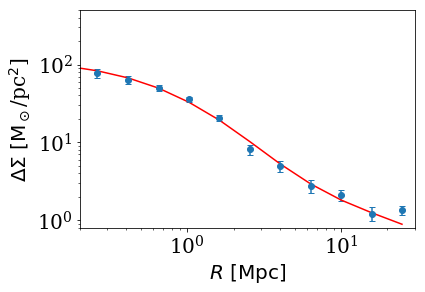

In [7]:
def compare_data_to_model(zi, lj, with_orientation=False):
    model_name = "full"
    name = "Y1"
    blinded = True
    args = get_args(model_name, zi, lj, name, "SAC", blinded)
    
    print("z%dl%d blinding factor: "%(zi, lj), args['blinding_factor'])
    fig, ax = plt.subplots()
    add_lensing_data_to_axis(ax, args)
    add_bestfit_model_to_axis(ax, zi, lj, args)
    add_bestfit_model_to_axis(ax, zi, lj, args, True, c='b')

    ax.loglog()
    xlim = ax.set_xlim(0.2, 30.)
    ylim = ax.set_ylim(.8, 5e2)
    _ = ax.set_xlabel(Rlabel)
    _ = ax.set_ylabel(DSlabel)
    return
compare_data_to_model(0,3)

('unmodified Bcov: ', array([3.03735681e-05, 6.10714729e-06, 4.29596519e-06, 3.01796193e-06,
       1.56262660e-06, 2.30674435e-06, 6.58086275e-07, 7.26615877e-07]))
('Hartlap factor: ', 1.1)
	'name':Y1 supplied, using a pre-defined cosmology.
('z2l3 blinding factor: ', -0.13755635020107293)
[13.92255     4.75642453  0.17105582  0.25827705  1.01756054  0.12619957
  0.38257223]
[13.80216567  8.28484206  0.1700405   0.26721215  1.01485985  0.1317346
  0.37397681]


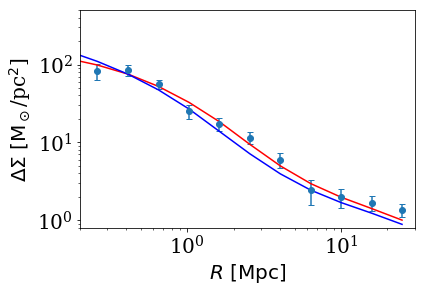

In [8]:
compare_data_to_model(2, 3)